In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from pspy import so_dict, pspy_utils
from pspipe_utils import pspipe_list

In [2]:
mnms_dir = Path("/pscratch/sd/x/xgarrido/analysis/act/products/dr6/mnms/")
param_dict_file = mnms_dir / "global_dr6_v4_updated.dict"
spectra = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

d = so_dict.so_dict()
d.read_from_file(param_dict_file)
spec_list = pspipe_list.get_spec_name_list(d, delimiter="_")  # unrolled fields
_, _, lb, _ = pspy_utils.read_binning_file(d["binning_file"], d["lmax"])  # get binning info
n_spec = len(spectra)
n_bins = len(lb)  # number of bins is same for all spectra in block

In [3]:
# na, nb, nc, nd are each i.e. 'dr6_pa6_f150'
spec1, spec2 = spec_list[-1], spec_list[-1]
na, nb = spec1.split("x")
nc, nd = spec2.split("x")

# covmat contains the binned TT, TE, ... covariance
c_base = np.load(mnms_dir / "covariances" / f"analytic_cov_{na}x{nb}_{nc}x{nd}.npy")
c_mnms = np.load(mnms_dir / "covariances" / f"mc_cov_{na}x{nb}_{nc}x{nd}.npy")

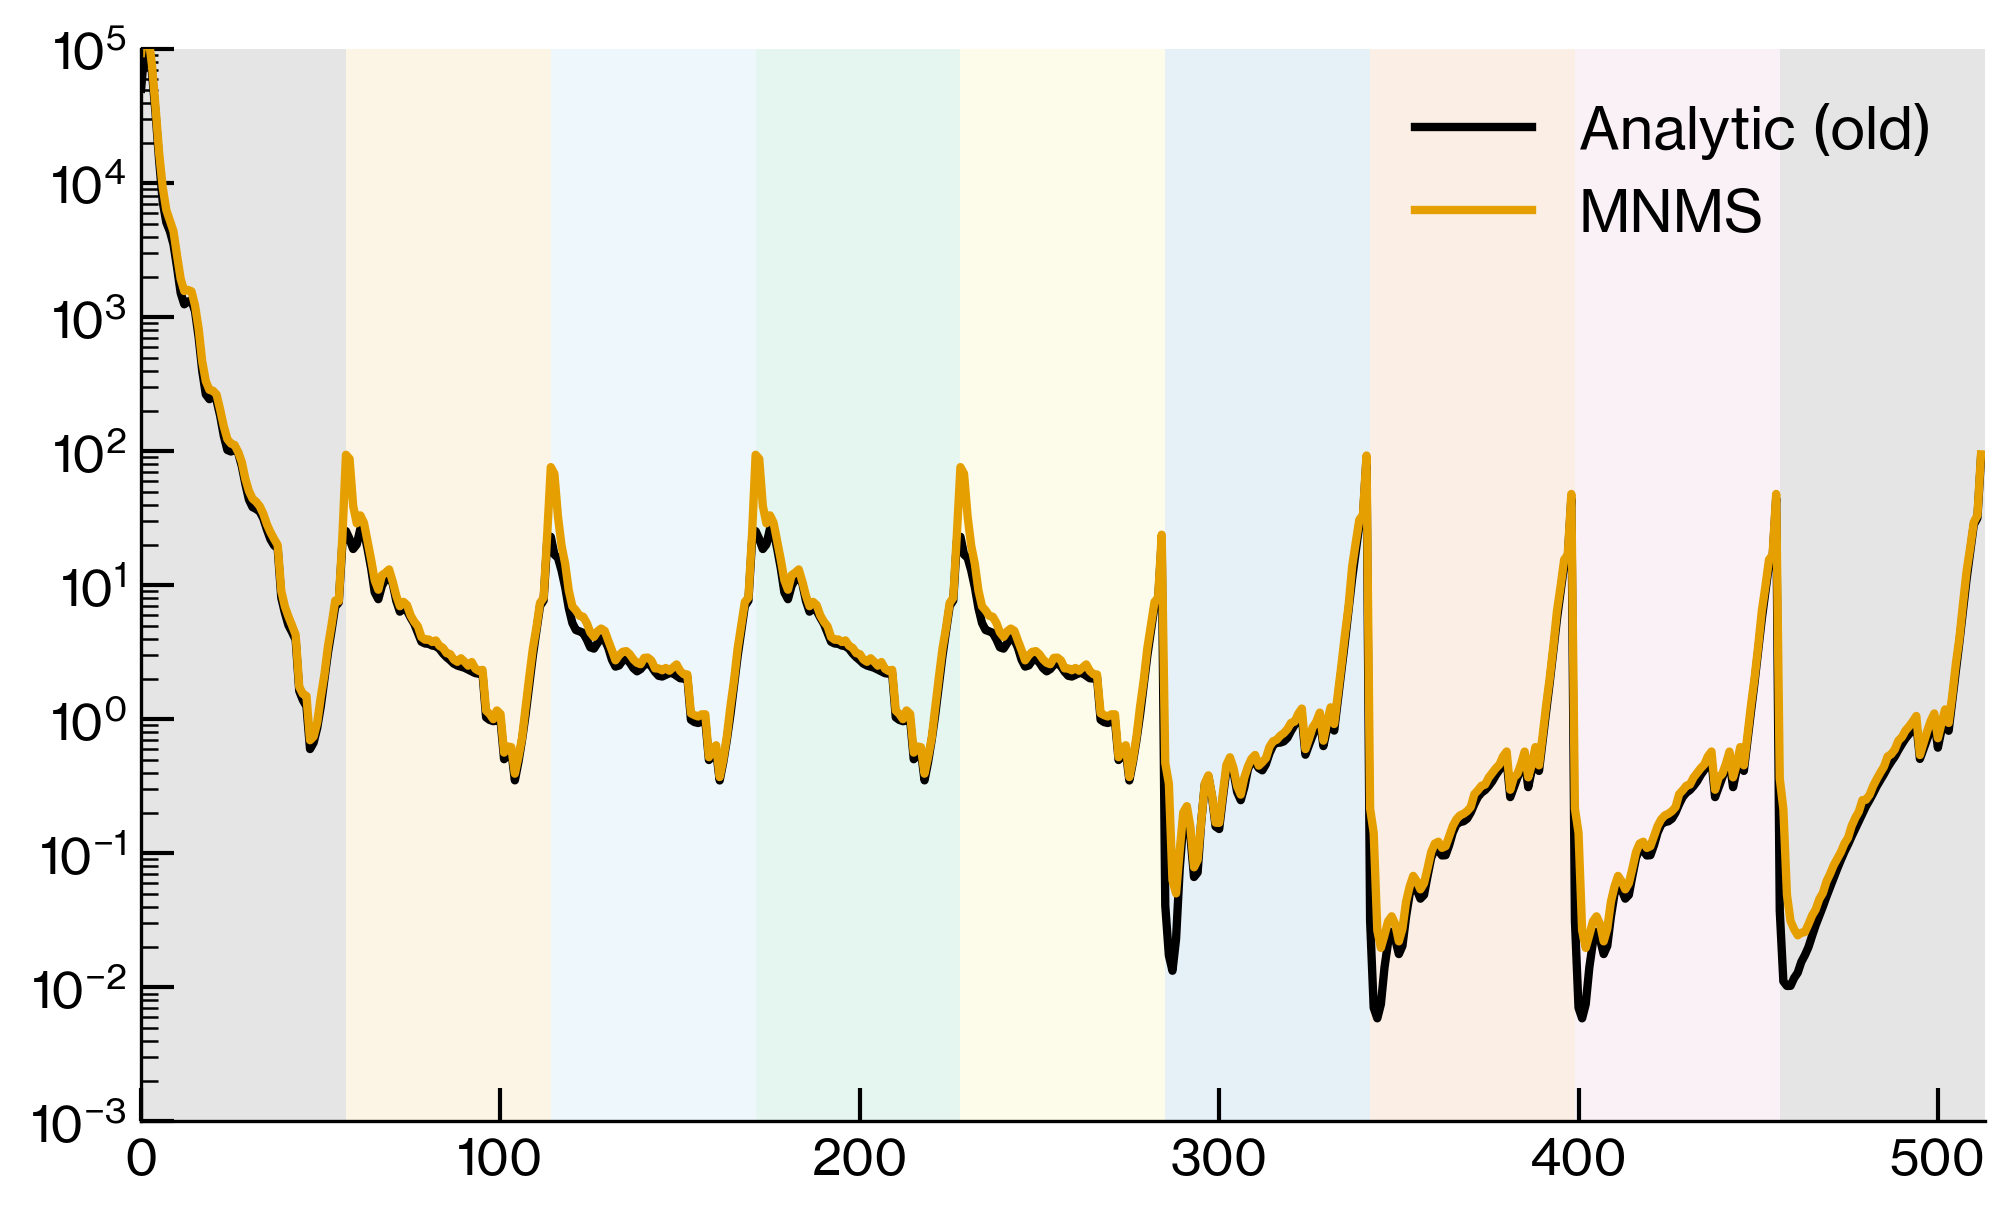

In [4]:
plt.plot(np.diag(c_base), label="Analytic (old)")
plt.plot(np.diag(c_mnms), label="MNMS")
plt.yscale("log"); plt.xlim(0,c_base.shape[1]); plt.ylim(1e-3, 1e5); plt.legend()

# indices of each block, i1:i2 = (s1 * n_bins):((s1 + 1) * n_bins)
[plt.fill_betweenx([1e-3,1e5], s1 * n_bins, (s1 + 1) * n_bins, alpha=0.1) for s1 in range(n_spec)];

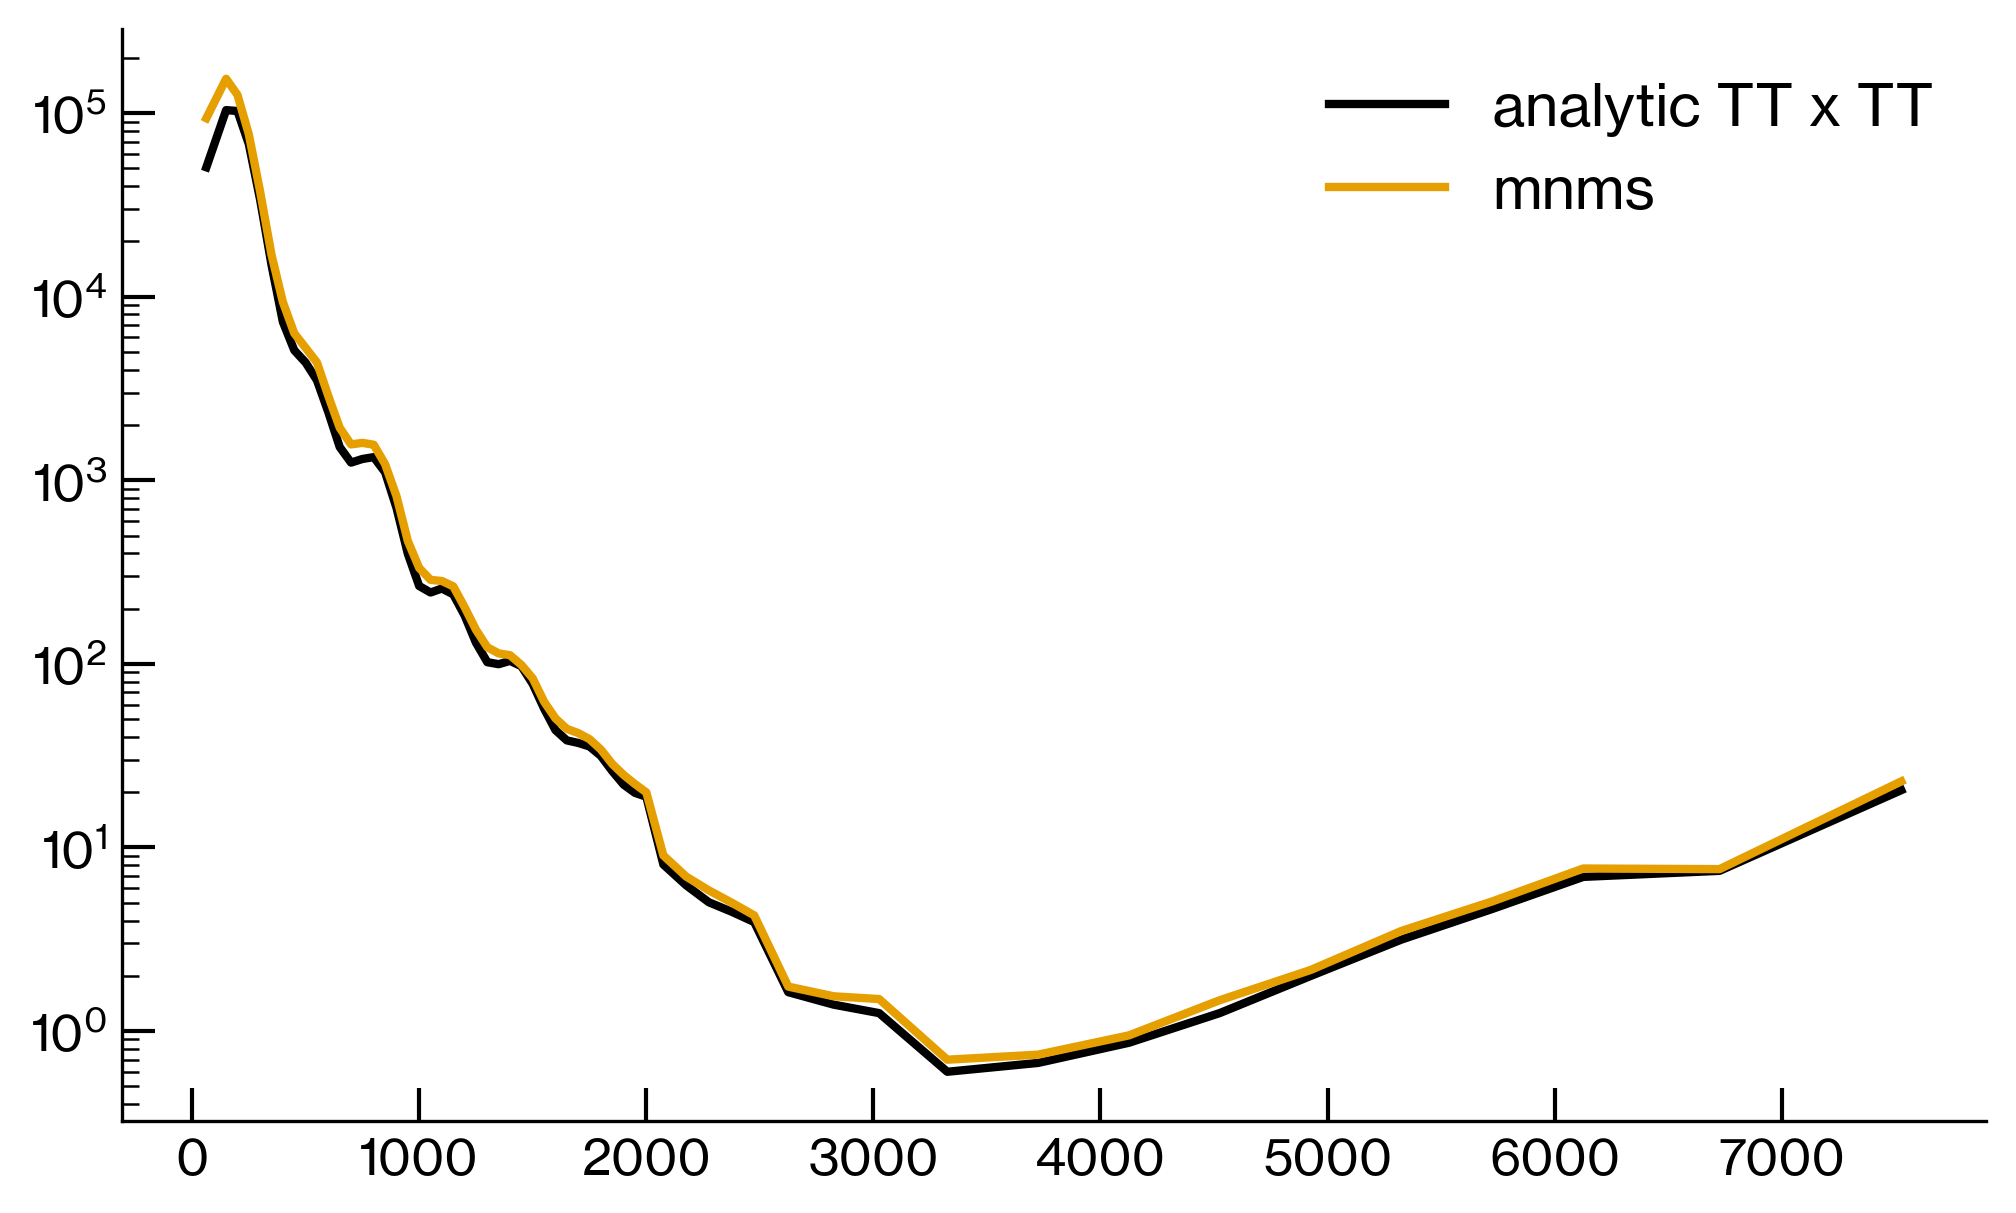

In [5]:
s1, s2 = 0, 0

sub_block_base = c_base[s1 * n_bins:(s1 + 1) * n_bins, s2 * n_bins:(s2 + 1) * n_bins]
sub_block_mnms = c_mnms[s1 * n_bins:(s1 + 1) * n_bins, s2 * n_bins:(s2 + 1) * n_bins]

plt.plot(lb, np.diag(sub_block_base), label=f"analytic {spectra[s1]} x {spectra[s2]}")
plt.plot(lb, np.diag(sub_block_mnms), label=f"mnms")
plt.yscale("log"); plt.legend();